In [1]:
from import_file import *

# Introduction and model
Copy the Hamiltonian model given in Ref[^Ref1]. It's a sign-free model thus we can apply the QMC method on this system, but I'm only trying to reproduce the mean field results in Ref[^Ref2].
$$ H=-t\sum_{\langle ij\rangle}(c_{i\sigma}^{\dagger}c_{j\sigma}+H.c.)+\sum_{\langle ij\rangle}H_I $$
where $H_I$ contains four basic operator: singlet bond operator, singlet current operator, triplet bond operator and triplet current operator. However, in order to constract a T-invariant HS-decomposition, the Hamiltonian in QMC would not be favor the singlet current order and triplet bond order. Therefore we only consider the QMC favor order: singlet bond and triplet current order.
$$H_I=-\frac{g_{sbd}}{2}M_{ij}M_{ij}-\frac{g_{tcur}}{2}\vec N_{ij}\cdot\vec N_{ij}$$
$$M_{ij}=c_{i\sigma}^{\dagger}c_{j\sigma}+H.c.;N_{ij}=i\{c_{i\sigma}^{\dagger}(\frac{\vec\sigma}{2})_{\sigma\sigma'}c_{j\sigma'}-H.c.\}$$
Next, with the help of partition function, we can calculate many physics properties. To obtain the partition function of the many body model, we perform the HS decompostion in each channel, respectively,
$$Z=\int DMD\vec N e^{-\int_0^{\beta}d\tau \sum_{\langle ij\rangle}g_{sbd}M^2_{ij}(\tau)/2+g_{tcur}\vec N^2_{ij} (\tau)/2 }Tr\left( e^{-\int_0^{\beta}d\tau H_{band}+H_I'(\tau)}\right)$$
where we used the Gaussian integral. 
$$\exp(\frac{1}{2}A^2)=\sqrt{2\pi}\int dx \exp(-\frac{1}{2}x^2-xA)$$
and we defined two variables,
$$M_{ij}=\frac{1}{\sqrt{\Delta\tau g_{sbd} }}x_{ij},~\vec N_ij=\frac{1}{\sqrt{\Delta\tau g_{tcur}}}\vec x_{ij}$$
Then, comparing with the path integral formular of partition function,
$$Z=\int DMD\vec Ne^{-S(M,\vec N)}$$
Follow the derivation in Ref[2], in mean field approximation, the configuration is near the saddle-point and fluctuations around it are negligible. Meanwhile if we neglect the $\tau$ dependence of the auxiliary field, we reach the mean-field Hamiltonian and the effective action,
$$S=\left(\beta \sum_{\langle ij\rangle}g_{sbd}M^2_{ij}/2+g_{tcur}\vec N^2_{ij}/2\right)-\ln Tr\left( e^{-\beta (H_{band}+H_I')}\right)$$

$$H_{MF}= H_{band}+H_I'=-t\sum_{\langle ij\rangle}(c_{i\sigma}^{\dagger}c_{j\sigma}+H.c.)-g_{sbd}\sum_{\langle ij\rangle}M_{ij}(c_{i\sigma}^{\dagger}c_{j\sigma}+H.c.)-g_{tcur}\sum_{\langle ij\rangle}\vec N_{ij}\cdot i\{c_{i\sigma}^{\dagger}(\frac{\vec\sigma}{2})_{\sigma\sigma'}c_{j\sigma'}-H.c.\}$$
Solve the saddle point equation
$$\frac{\partial S(M,N)}{\partial M}=0;~\frac{\partial S(M,N)}{\partial\vec N}=0$$
we reached the mean-field solution, $\langle ...\rangle$means the average over mean field Hamiltonian $H_{MF}$,
$$M_{ij}=\langle c_{i\sigma}^{\dagger}c_{j\sigma}+H.c.\rangle;~\vec N_{ij}=i\langle c_{i\sigma}^{\dagger}(\frac{\vec\sigma}{2})_{\sigma\sigma'}c_{j\sigma'}-H.c.\rangle$$

With the knowledge of the mean field order $M_{ij},\vec N_{ij}$, at half-filling case, we consider the restrict order parameter from[^Ref2],
$$\vec N_{ij}=2×N(-1)^{i_x+i_y}(\delta_{j-i,\hat x}-\delta_{j-i,\hat y} )\hat z$$
and because the ground state of singlet bond has dimerized structure[^Ref3], we use four-site unit cell and the restrict order parameter are,
$$
M_{ij,A}=M_A(\delta_{j-i,\hat x}+\delta_{j-i,\hat y})\\
M_{ij,B}=M_B(\delta_{j-i,\hat x}+\delta_{j-i,\hat y})\\
M_{ij,C}=M_C(\delta_{j-i,\hat x}+\delta_{j-i,\hat y})\\
M_{ij,D}=M_D(\delta_{j-i,\hat x}+\delta_{j-i,\hat y})
$$
A,C belong to the sublattice $\Lambda_A$, B, D belong to the other sublattice $\Lambda_B$.
## Numerical approach: real-space lattice
We substitute the restric order parameter into mean-filed Hamiltonian, then
$$
\begin{aligned}
H_{MF}=-t\sum_{\langle ij\rangle}(c_{i\sigma}^{\dagger}c_{j\sigma}+H.c.)-\sum_{i\in\Lambda'}\sum_{s\in {UC}_i}\sum_{j}&g_{sbd}M_s(\delta_{j-i_s,\hat x}+\delta_{j-i_s,\hat y})(c_{i_s\sigma}^{\dagger}c_{j\sigma}+H.c.)+g_{tcur}N(-1)^{\Lambda_s}(\delta_{j-i,\hat x}-\delta_{j-i,\hat y})i(c_{i\sigma}^{\dagger}\sigma_zc_{j\sigma}-H.c.)\\
=-t\sum_{\langle ij\rangle}(c_{i\sigma}^{\dagger}c_{j\sigma}+H.c.)-\sum_{i\in\Lambda'}\sum_{s\in {UC}_i}\sum_{j}&c_{i_s}^{\dagger}\left(\begin{matrix}
g_{sbd}M_s+ig_{tcur}N(-1)^{\Lambda_s} & \\
~& g_{sbd}M_s-ig_{tcur}N(-1)^{\Lambda_s}\end{matrix}\right)c_{j}\delta_{j-i_s,\hat x}\\
+&c_j^{\dagger}\left(\begin{matrix}
g_{sbd}M_s-ig_{tcur}N(-1)^{\Lambda_s} & \\
~& g_{sbd}M_s+ig_{tcur}N(-1)^{\Lambda_s}\end{matrix}\right)c_{i_s}\delta_{j-i_s,\hat x}\\
+&c_{i_s}^{\dagger}\left(\begin{matrix}
g_{sbd}M_s-ig_{tcur}N(-1)^{\Lambda_s} & \\
~& g_{sbd}M_s+ig_{tcur}N(-1)^{\Lambda_s}\end{matrix}\right)c_{j}\delta_{j-i_s,\hat y}\\
+&c_j^{\dagger}\left(\begin{matrix}
g_{sbd}M_s+ig_{tcur}N(-1)^{\Lambda_s} & \\
~& g_{sbd}M_s-ig_{tcur}N(-1)^{\Lambda_s}\end{matrix}\right)c_{i_s}\delta_{j-i_s,\hat y}\\
\end{aligned}
$$
We can diagonalize this Hamiltonian and calculate the local density of state $\rho(i,j)$ which can be further used in calcuating the order parameter from the definition. Through this procedure, we can solve self-consistently.

## Numerical approach: reciprocal lattice
We assume the order $M_A=M_C,M_B=M_D$, then doing the Fourie transformation on the lattice reconstructed by the new unit cell.


## Mean Field Rountine
You may want to change some variables in the kernel below, and run it for while which might take some time. The cluster below provides the method of changing the coupling strength $g_{tcur}$and$g_{sbd}$in the half-filling condition,

In [3]:
# parameters
Row = 20; Col=Row
g_tcur_l = [0.05+i for i in range(5)]
g_sbd_l = [0.0]
tau = 0.0001 # criteria
#
mf.main_cluster(Row, Col, tau, g_sbd_l, g_tcur_l)

para from init:
  M: [0.44190986 0.70249795 0.93378335 0.06799356] 
 N: [0.21382632]
para from last U: [array([0.80147564+0.j, 0.81305353+0.j, 0.81381259+0.j, 0.80071658+0.j]), (0.030236530161053682+0j)]
para from last U: [array([0.80159933+0.j, 0.79721271+0.j, 0.79435202+0.j, 0.80446002+0.j]), (0.08343095958769764+0j)]
para from last U: [array([0.77561823+0.j, 0.77423142+0.j, 0.77317036+0.j, 0.7766793 +0.j]), (0.12268074561482224+0j)]
para from last U: [array([0.74892449+0.j, 0.74596773+0.j, 0.7507361 +0.j, 0.74415613+0.j]), (0.14278194477822864+0j)]
g1:
 [0.0, 0.0, 0.0, 0.0, 0.0]
M:
 [[0.8014756358171297, 0.8130535321971823, 0.8138125922990481, 0.8007165757152792], [0.8015993295429473, 0.7972127144396046, 0.7943520243392354, 0.8044600196433178], [0.775618233138104, 0.7742314216669288, 0.7731703560655062, 0.7766792987395266], [0.7489244910397559, 0.7459677330429396, 0.7507360976937423, 0.7441561263889546], [0.7247930900681363, 0.7169421973034926, 0.7203664324781567, 0.7213688548934719

Then, let's consider the order parameter when we change the doping condition. We vary the doping strength, defined as $\delta=1-N_{elec}/N_{site}$, and measure the changes in different coupling strength $g_{tcur}$.

In [6]:
# parameters
Row = 20; Col=Row
g_tcur_l = 2.0
g_sbd_l = 0.0
delta = [i*0.05 for i in range(4)]+[0.2+i*0.025 for i in range(6)]+[0.24,0.26]
delta.sort()
print('delta: ',delta)
tau = 0.00005 # criteria
#
mf.main_doping(Row, Col, tau, g_sbd_l, g_tcur_l,delta)

delta:  [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.225, 0.24, 0.25, 0.26, 0.275, 0.30000000000000004, 0.325]
para from init:
  M: [0.07372614 0.7649538  0.10347424 1.07065216] 
 N: [0.49365495]
para from last U: [array([0.77868681+0.j, 0.77465076+0.j, 0.7773485 +0.j, 0.77598907+0.j]), (0.120092451333871+0j)]
para from last U: [array([0.78067946+0.j, 0.78067946+0.j, 0.78067946+0.j, 0.78067946+0.j]), (0.10703134306746981+0j)]
para from last U: [array([0.77844429+0.j, 0.77407713+0.j, 0.78104615+0.j, 0.76855633+0.j]), (0.09411903904594984+0j)]
para from last U: [array([0.76533594+0.j, 0.76533594+0.j, 0.76533594+0.j, 0.76533594+0.j]), (0.08548370489842828+0j)]
para from last U: [array([0.78805549+0.j, 0.79066174+0.j, 0.79068208+0.j, 0.79362862+0.j]), (-0.0013528098071304991+0j)]
para from last U: [array([0.7821939 +0.j, 0.79028306+0.j, 0.79036902+0.j, 0.78459136+0.j]), (-0.000821972873769506+0j)]
para from last U: [array([0.78254101+0.j, 0.78270079+0.j, 0.78347959+0.j, 0.77596588+0.j]), (

# Mean Field Results
The data was stored in directory 'results'. First, we plot the order $N_ij$ as a function of $g_{tcur}$ under the condition $g_{sbd}=0$. It's worthy mentioning that the model in Assaad's paper [^Ref2] is different from ours by the coupling strength to be 4 times bigger than the case here. Therefore the results $g_{tcur}=4$ in this sense should match the $g=1$ in his paper. And the reason why we multiply $N_{ij}$ by 4 is the definition of $N$ in Eq.(1) is 4 times less than the definition in Ref.2

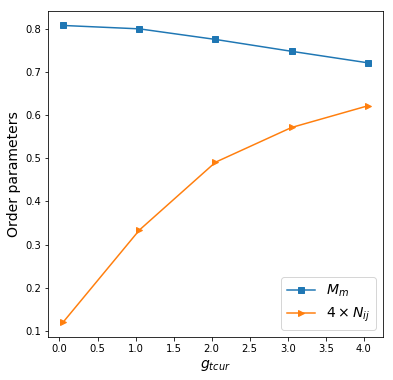

In [18]:
m_ij = []; n_ij = []; gtcur = []
path = os.getcwd()
filename = os.path.join(path,'results/c1/tcur_u.json')
with open(filename) as f:
    data = json.load(f)
f.close()

for i in data[1]:
    m_ij.append(sum(i)/len(i))
gtcur = data[2]
n_ij = [4*abs(i) for i in data[3]]

fig, ax1 = plt.subplots(1,1,figsize=(6,6))
ax1.plot(gtcur,m_ij,marker='s',label=r'$M_m$')
ax1.plot(gtcur,n_ij,marker='>',label=r'$4\times N_{ij}$')
ax1.set_xlabel(r'$g_{tcur}$',fontsize=14)
ax1.set_ylabel('Order parameters',fontsize=14)
ax1.legend(fontsize=14)
figname = os.path.join(path,'fig/OP_gtcur.png')
plt.savefig(figname)
plt.show()

Next, We plot the d density wave order parameter against the doping ratio $\delta$, where the data files are stored in "results/gsbd_%i\_gtcur_%i_delta.json". The plot shows the doping induced phase transitions whose transition points are similar to the value of $\delta$ in Ref.2

gsbd_0_gtcur_2_delta.json
gsbd_0_gtcur_4_delta.json


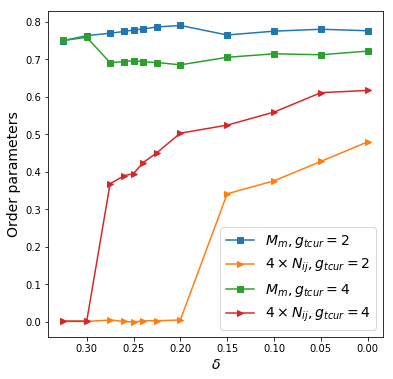

In [2]:
fig, ax2 = plt.subplots(1,1,figsize=(6,6))
gtcur_list = [2.0,4.0]  # check the files in results/c2
gsbd = 0.0
path = os.getcwd()
dirname = os.path.join(path,'results/c2')
filelist = os.listdir(dirname)
l = 0
for files in filelist:
    delta = []
    m_ij = []
    n_ij = []
    if os.path.isdir(files): continue
    print(files)
    gtcur = gtcur_list[l]
    l += 1
    filename = os.path.join(path,'results/c2/'+files)
    with open(filename) as f:
        data = json.load(f)
    f.close()
    delta = data[1]
    for i in data[2]:
        m_ij.append(sum(i)/len(i))
    n_ij = [4*abs(i) for i in data[3]]
    ax2.plot(delta,m_ij,marker='s',label=r'$M_m,g_{tcur}=%i$'%(gtcur))
    ax2.plot(delta,n_ij,marker='>',label=r'$4\times N_{ij},g_{tcur}=%i$'%(gtcur))
fig.gca().invert_xaxis()
ax2.set_xlabel(r'$\delta$',fontsize=14)
ax2.set_ylabel('Order parameters',fontsize=14)
ax2.legend(fontsize=14)
figname = os.path.join(path,'fig/Dope_gtcur.png')
plt.savefig(figname)
plt.show()

[^Ref1]: C. Wu, Phys. Rev. B 71, 155115 (2005)  

[^Ref2]: F.F. Assaad, Phys. Rev. B 75, 045115 (2007)

[^Ref3]: J. B. Marston and I. Affleck, Phys. Rev. B 39, 11538 (1989)